# Fake News Prediction using Logistic Regression

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import re
import scipy
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
data=pd.read_csv('train.csv')

In [5]:
data.shape

(20800, 5)

In [6]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [8]:
data.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [9]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [10]:
data=data.fillna('')

In [11]:
data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [35]:
data['content']=data['author']+'-'+data['title']

In [36]:
print(data['content'])

0        Darrell Lucus-House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn-FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com-Why the Truth Might Get You...
3        Jessica Purkiss-15 Civilians Killed In Single ...
4        Howard Portnoy-Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson-Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman-N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams-Macy...
20798    Alex Ansary-NATO, Russia To Hold Parallel Exer...
20799              David Swanson-What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [54]:
X=data.drop(columns='label',axis=1)
Y=data['label']

In [38]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [16]:
# Stemming:It refers to reduce a word to its root value.

In [39]:
port_stem=PorterStemmer()

In [40]:
def stemming(content):
    stemmed_content=re.sub('[^a-zA-Z]',' ',content)
    stemmed_content=stemmed_content.lower()
    stemmed_content=stemmed_content.split()
    stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content=' '.join(stemmed_content)
    
    return stemmed_content

In [42]:
data['content']=data['content'].apply(stemming)

In [43]:
data['content']

0        darrel lucu hou dem aid even see comey letter ...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exerci b...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object

In [60]:
X=data['content'].values
Y=data['label'].values

In [61]:
print(X)

['darrel lucu hou dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exerci balkan'
 'david swanson keep f aliv']


In [62]:
vector=TfidfVectorizer()

In [63]:
X=vector.fit_transform(X)
print(X)

  (0, 15553)	0.28485063562728646
  (0, 2464)	0.3676519686797209
  (0, 7612)	0.24785219520671603
  (0, 8546)	0.29212514087043684
  (0, 2933)	0.2468450128533713
  (0, 13348)	0.2565896679337957
  (0, 4917)	0.233316966909351
  (0, 263)	0.27010124977708766
  (0, 3759)	0.2705332480845492
  (0, 6930)	0.21874169089359144
  (0, 8822)	0.3635963806326075
  (0, 3567)	0.3598939188262559
  (1, 1877)	0.15614790568229528
  (1, 2206)	0.36915639258038363
  (1, 16656)	0.3025156488372128
  (1, 1481)	0.2957471154505952
  (1, 2790)	0.19208753385709676
  (1, 6744)	0.19152496072048605
  (1, 5440)	0.7186013955384664
  (1, 3535)	0.2653147533915268
  (2, 5326)	0.3866530551182615
  (2, 5903)	0.3474613386728292
  (2, 9532)	0.49351492943649944
  (2, 15478)	0.41544962664721613
  (2, 2917)	0.3179886800654691
  :	:
  (20797, 1274)	0.3355398041847889
  (20797, 12998)	0.24837050368318928
  (20797, 12227)	0.2727640214571724
  (20797, 14838)	0.311742474262946
  (20797, 12022)	0.2479002225274413
  (20797, 9431)	0.293949478

In [64]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [65]:
model=LogisticRegression()

In [66]:
model.fit(X_train,Y_train)

LogisticRegression()

In [93]:
prediction=model.predict(X_test)
#prediction.shape
#X_test.shape
print(prediction)

[1 0 1 ... 1 1 0]


In [76]:
accuarcy=accuracy_score(prediction,Y_test)

In [78]:
print(accuarcy)

0.9790865384615385


C:\Users\ASUS\AppData\Local\Temp\ipykernel_3528\4051857847.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data.corr()


array([[<AxesSubplot: xlabel='id', ylabel='id'>,
        <AxesSubplot: xlabel='label', ylabel='id'>],
       [<AxesSubplot: xlabel='id', ylabel='label'>,
        <AxesSubplot: xlabel='label', ylabel='label'>]], dtype=object)

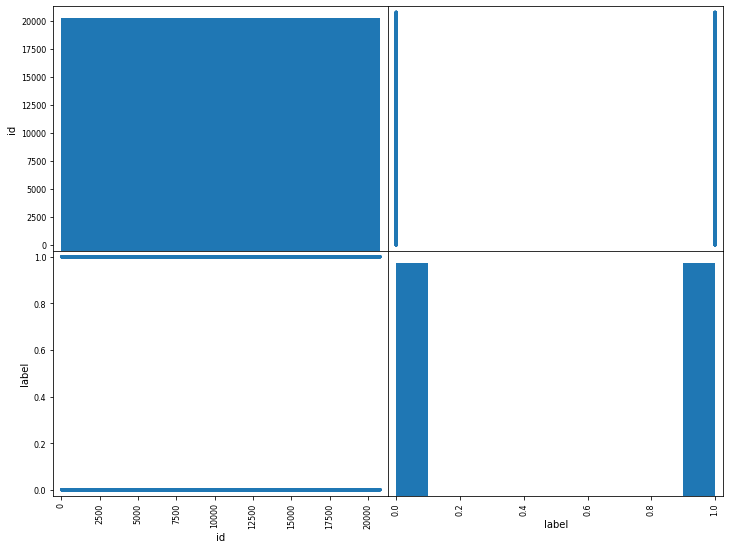

In [107]:
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix


corr_matrix=data.corr()
corr_matrix['label'].sort_values
scatter_matrix(data,figsize=(12,9))

In [108]:
'''data_input=()
data_input=np.asarray(data_input)
data_input=data_input.apply(stemming)
output=model.predict(data_input)
if(output[0]==0):
    print("It's fake news")
else:
    print("It's real news")
'''

'data_input=()\ndata_input=np.asarray(data_input)\ndata_input=data_input.apply(stemming)\noutput=model.predict(data_input)\nif(output[0]==0):\n    print("It\'s fake news")\nelse:\n    print("It\'s real news")\n'